## Data Cleaning 

You'll notice that this dataset is by no means ready for analysis. We have:

* a numeric column interpreted as a string
* extra columns that are not relevant to our analysis
* multiple rows with missing values
* column names are too long

Let's "clean" our dataset by fixing these errors below.

In [193]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
# TODO: load in excel file "../../data/raw/realestate.xlsx"
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
df = pd.read_excel("../../data/raw/realestate.xlsx")

# check how many missing values we have
df.isna().sum()
df

,No,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,32.0,"""84.87882""",100.0,24.98298,121.54024,37.9
1,2,19.5,"""306.5947""",9.0,24.98034,121.53951,42.2
2,3,13.3,"""561.9845""",5.0,24.98746,121.54391,47.3
3,4,13.3,"""561.9845""",5.0,24.98746,121.54391,54.8
4,5,5.0,"""390.5684""",5.0,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,410,13.7,"""4082.015""",0.0,24.94155,121.50381,15.4
410,411,5.6,"""90.45606""",9.0,24.97433,121.54310,50.0
411,412,18.8,"""390.9696""",7.0,24.97923,121.53986,40.6
412,413,8.1,"""104.8101""",5.0,24.96674,121.54067,52.5


In [195]:
# create dictionary of mappings
rename_dict = {
    "X2 house age": "house_age", 
    "X3 distance to the nearest MRT station": "distance_to_mrt", 
    "X4 number of convenience stores": "num_convenience_stores",
    "X5 latitude": "lat",
    "X6 longitude": "long",
    "Y house price of unit area": "price_unit_area"
}

# rename columns
df_rename = df.rename(columns=rename_dict)

# view new columns
df_rename.columns

Index(['No', 'house_age', 'distance_to_mrt', 'num_convenience_stores', 'lat',
       'long', 'price_unit_area'],
      dtype='object')

In [196]:
selected = ["lat", "long", "No"]

# TODO: Drop the selected columns 
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
df_drop = df_rename.drop(columns=["lat", "long", "No"])

In [197]:
df_drop.head()

,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
0,32.0,"""84.87882""",100.0,37.9
1,19.5,"""306.5947""",9.0,42.2
2,13.3,"""561.9845""",5.0,47.3
3,13.3,"""561.9845""",5.0,54.8
4,5.0,"""390.5684""",5.0,43.1


In [198]:
# remove quotes from sample
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].str.strip("\"")

# TODO: convert the "distance_to_mrt" column to the "float" datatype
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].astype("float")

In [199]:
# check current "shape" of dataframe
df_drop.shape

(414, 4)

In [200]:
# TODO: Remove missing values from this dataframe
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
df.dropna(axis= 'columns', how='all')

# check shape again
df_drop.shape

(414, 4)

## Explore Again

Now that we've cleaned our dataset, let's again explore the relationships & distributions of our dataset. 

Perhaps we missed something "qualitative" about our data that we should remove. 

In [201]:
# TODO: print out the summary statistics (mean, median, max, min, count) of all numeric columns
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
df.describe()

,No,X2 house age,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,403.000000,413.000000,414.000000,414.000000,414.000000
mean,207.500000,18.607196,4.283293,24.969030,121.533361,37.980193
std,119.655756,22.656541,5.580361,0.012410,0.015347,13.606488
min,1.000000,0.000000,-6.000000,24.932070,121.473530,7.600000
25%,104.250000,8.700000,1.000000,24.963000,121.528085,27.700000
50%,207.500000,16.100000,4.000000,24.971100,121.538630,38.450000
75%,310.750000,28.300000,6.000000,24.977455,121.543305,46.600000
max,414.000000,410.300000,100.000000,25.014590,121.566270,117.500000


In [202]:
# notice how the minimum value for "num_convenience_stores" is -6
# how do we have -6 convenience stores? this must be an error, let's remove it

df_outl = df_drop[df_drop.num_convenience_stores >= 0]
df_outl.shape

(412, 4)

In [203]:
# notice how the maximum value for "num_convenience_stores" is 100
# (the median convenice stores is 4, the mean is 4.29, this shows that this is most likely an error)

# TODO: implement this logic in the brackets
# documentation: https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing
df_outl = df_outl[df_outl.num_convenience_stores < 99]
df_outl.shape

(411, 4)

In [204]:
# notice how the maximum "house_age" is 410.3 years old 
# not looking at statistics, the oldest house in Taiwan was built in the 17th century (300 years at most)
# let's remove this value
df_outl = df_outl[df_outl.house_age != 410.3]
df_outl

,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
1,19.5,306.59470,9.0,42.2
2,13.3,561.98450,5.0,47.3
3,13.3,561.98450,5.0,54.8
4,5.0,390.56840,5.0,43.1
5,7.1,2175.03000,3.0,32.1
...,...,...,...,...
409,13.7,4082.01500,0.0,15.4
410,5.6,90.45606,9.0,50.0
411,18.8,390.96960,7.0,40.6
412,8.1,104.81010,5.0,52.5


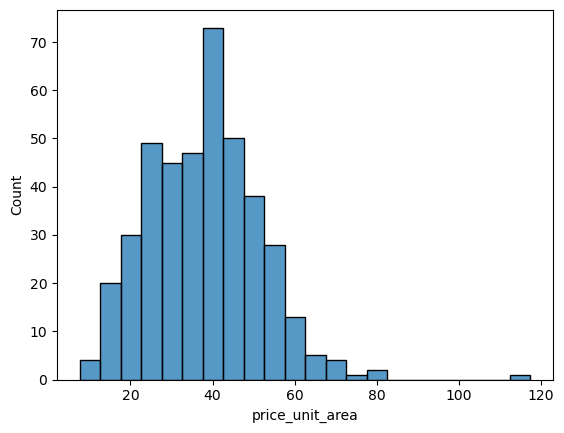

In [205]:
# let's explore our visualizations again, starting with univariate

# TODO : plot histogram of "price_unit_area" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl["price_unit_area"])
plt.show()

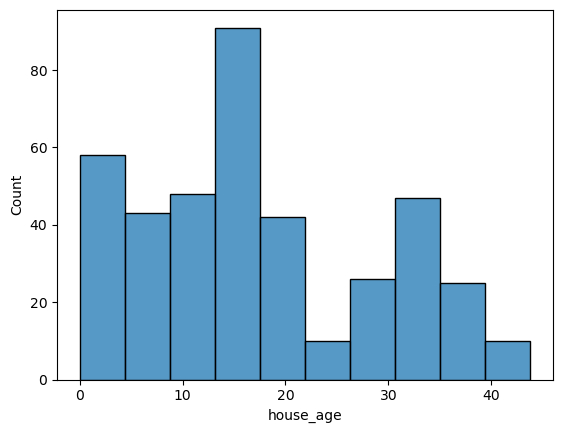

In [206]:
# TODO : plot histogram of "house_age" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl["house_age"])
plt.show()

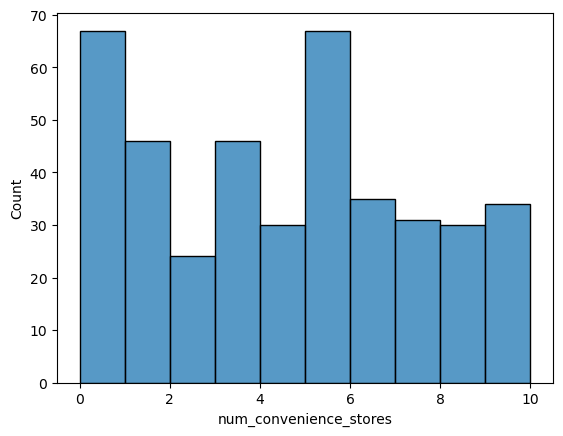

In [207]:
# TODO : plot histogram of "num_convenience_stores" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl["num_convenience_stores"])
plt.show()

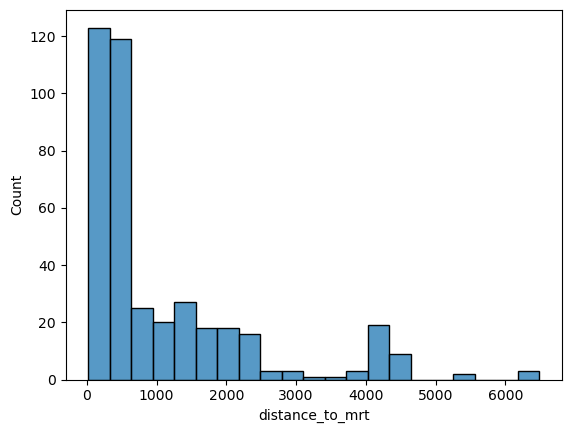

In [208]:
# TODO : plot histogram of "distance_to_mrt" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl["distance_to_mrt"])
plt.show()

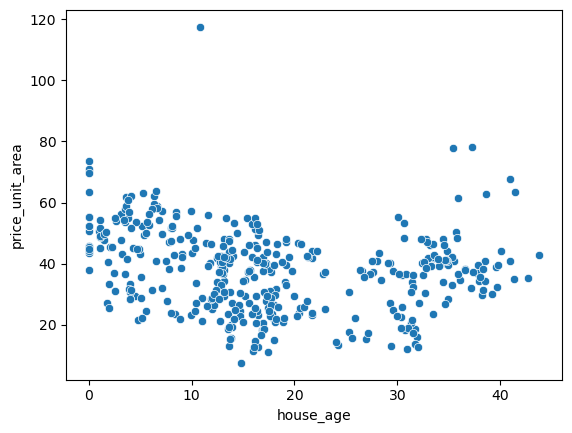

In [209]:
# next we move onto scatter-plots (bi-variate analysis)

# TODO : plot scatter plot of "house_age" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_outl, x="house_age", y="price_unit_area")
plt.show()

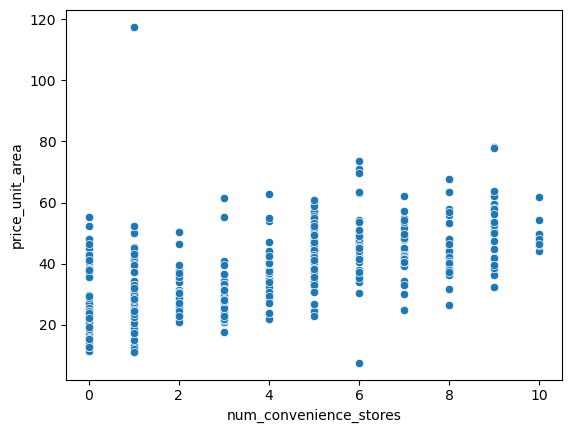

In [210]:
# TODO : plot scatter plot of "num_convenice_stores" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_outl, x="num_convenience_stores", y="price_unit_area")
plt.show()

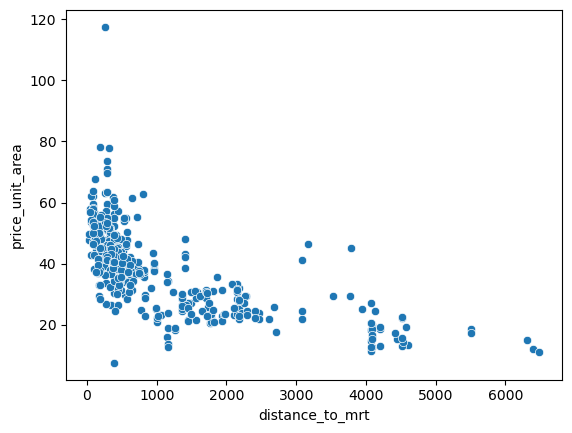

In [211]:
# TODO : plot scatter plot of "distance_to_mrt" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_outl, x="distance_to_mrt", y="price_unit_area")
plt.show()

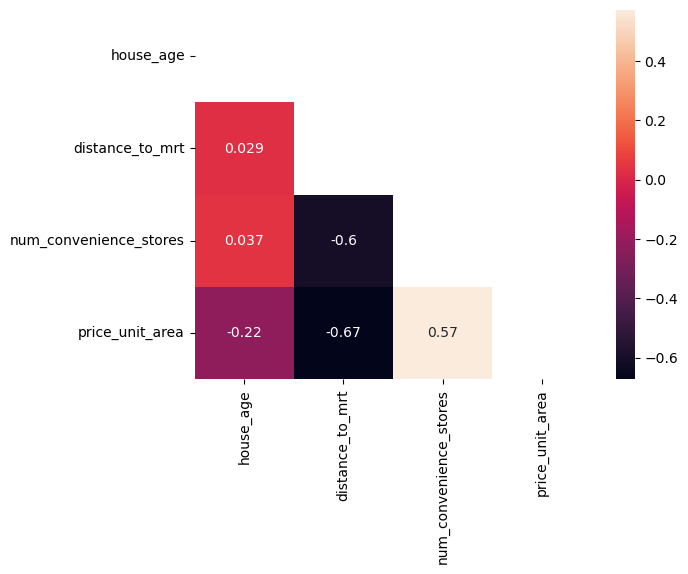

In [212]:
mask = np.triu(np.ones_like(df_outl.corr(), dtype=bool))

sns.heatmap(df_outl.corr(), annot=True, mask=mask)
plt.show()

In [213]:
# save data for later modeling
df_drop.to_csv("../../data/processed/tpdata.csv", index=False)